Write  a colab pytorch classes based - 3 layer deep neural network for non linear regression using pytorch builtin functionality of modules, backdrop

In [3]:
import torch
import torch.nn as nn

generate data

In [6]:
import numpy as np
import pandas as pd

In [8]:
n= 400
d=3
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5, 1,1],[1,1,1]]).T
bias_true = np.array([1])

model

In [9]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.ln1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.ln2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.ln1(x)
    r = self.relu(l1)
    l2 = self.ln2(r)
    return l2

weights and bias 

In [11]:
y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (400, 3), weights: (3, 2), bias: (1,), y: (400, 2)


built-in functions

In [12]:
loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(13.2929, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([400, 2])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


SCG

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(13.2929, grad_fn=<MseLossBackward0>)
tensor(9.3306, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([400, 2])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [15]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit the model

In [18]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)

tensor(2.7159, grad_fn=<MseLossBackward0>)
tensor(2.7106, grad_fn=<MseLossBackward0>)
tensor(2.7054, grad_fn=<MseLossBackward0>)
tensor(2.7002, grad_fn=<MseLossBackward0>)
tensor(2.6952, grad_fn=<MseLossBackward0>)
tensor(2.6904, grad_fn=<MseLossBackward0>)
tensor(2.6858, grad_fn=<MseLossBackward0>)
tensor(2.6813, grad_fn=<MseLossBackward0>)
tensor(2.6769, grad_fn=<MseLossBackward0>)
tensor(2.6728, grad_fn=<MseLossBackward0>)
tensor(2.6688, grad_fn=<MseLossBackward0>)
tensor(2.6649, grad_fn=<MseLossBackward0>)
tensor(2.6612, grad_fn=<MseLossBackward0>)
tensor(2.6576, grad_fn=<MseLossBackward0>)
tensor(2.6540, grad_fn=<MseLossBackward0>)
tensor(2.6506, grad_fn=<MseLossBackward0>)
tensor(2.6474, grad_fn=<MseLossBackward0>)
tensor(2.6443, grad_fn=<MseLossBackward0>)
tensor(2.6412, grad_fn=<MseLossBackward0>)
tensor(2.6383, grad_fn=<MseLossBackward0>)
tensor(2.6355, grad_fn=<MseLossBackward0>)
tensor(2.6328, grad_fn=<MseLossBackward0>)
tensor(2.6302, grad_fn=<MseLossBackward0>)
tensor(2.62

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([400, 2])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


3D plot of data

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


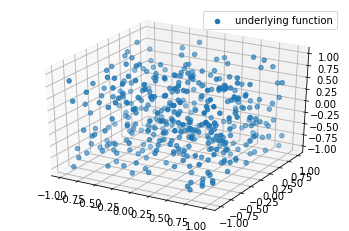

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)